In [ ]:
# Import relevant libraries for mounting drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Load the datasets
file_path1 = '/content/drive/Shareddrives/ENG M 680/Datasets/processed_weather_stations.csv'
file_path2 = '/content/drive/Shareddrives/ENG M 680/Datasets/processed_wildfire_df.csv'
file_path3 = '/content/drive/Shareddrives/ENG M 680/Datasets/weather_readings.csv'

# Upload the file to the Colab environment
!cp '{file_path1}' .
!cp '{file_path2}' .
!cp '{file_path3}' .

Mounted at /content/drive


In [ ]:
# Import relevant libraries
import pandas as pd

# Feed the files to dataframes
df1 = pd.read_csv('processed_weather_stations.csv')
df2 = pd.read_csv('processed_wildfire_df.csv')
df3 = pd.read_csv('weather_readings.csv')

# Display first 5 rows of df1
df1.head()

,Unnamed: 0.1,Unnamed: 0,station_id,name,type,forecast_region,latitude,longitude,elevation_meters,geometry,natural_subregion,forest_area
0,0,1,AC,Adams Creek,LO,ED,53.725400,-118.568300,2177.63,POINT (264702.734833854 5956498.305364526),Alpine,Edson
1,1,2,AD,ADAIR,LO,OJ,59.160627,-118.329472,394.00,POINT (309732.8063132892 6560062.553724932),Northern Mixedwood,High Level
2,2,3,AE,Abee Agrd,MET,LB,54.277300,-112.965400,664.00,POINT (632417.3237908484 6013877.280879932),Dry Mixedwood,Lac La Biche
3,3,4,AF,Alder Flats,LO,RM,52.930000,-114.940300,960.00,POINT (504011.3600067233 5862138.586128435),Lower Foothills,Rocky Mountain
4,4,5,AKM,Akamina Pass,PAW,CR,49.027200,-114.053500,1809.00,POINT (569163.5691843902 5428737.765222042),Subalpine,Calgary


In [ ]:
# Convert 'wind_direction' to numerical using a mapping
wind_direction_mapping = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5,
    'CALM': 0
}
df2['wind_direction'] = df2['wind_direction'].map(wind_direction_mapping)

In [ ]:
# Specify irrelevant columns in df2
columns_to_remove = ['Unnamed: 0', 'id', 'fire_number','discovered_date', 'dispatch_date',
                     'dispatched_resource', 'ia_getaway_time', 'assessment_datetime',
                     'assessment_size', 'assessment_result', 'assessment_resource',
                     'comments', 'initial_action_by','ia_arrival_at_fire_date', 'ia_access', 'air_ff_start_date',
                     'air_ff_start_size', 'ground_ff_start_date', 'ground_ff_start_size',
                     'bucketing_on_fire', 'distance_from_water_source', 'first_bucket_drop_date',
                     'first_bh_date', 'first_bh_size', 'first_uc_date', 'first_uc_size',
                     'first_to_date', 'first_to_size', 'first_ex_date', 'first_ex_size_perimeter',
                     'ia_getaway_obj', 'ia_start_size_obj', 'first_burn_period_obj',
                     'contained_size_obj', 'FA_NAME', 'forest_area', 'geometry', 'detection_agent_type']

# Remove the irrelevant columns
df2 = df2.drop(columns=columns_to_remove, errors='ignore')

# Display the first 5 rows of the updated dataframe
df2.head()

,year,date,smoke_type,smoke_color,smoke_base_size,condition_of_smoke,latitude,longitude,fire_spread_rate,fire_type,...,eco_zone_flag,wui_indicator,temperature,relative_humidity,wind_direction,wind_speed,weather_conditions_over_fire,current_size,size_class,hour_of_day
0,1996,1996-05-04 13:17:00,HC,LG,N,NaN,54.6204,-111.8382,2.0,Surface,...,NaN,N,NaN,NaN,225.0,10.0,Cloudy,75.0,D,13.283333
1,1996,1996-05-12 13:15:00,LC,LG,N,NaN,54.4033,-111.5060,3.0,Surface,...,NaN,N,NaN,NaN,315.0,10.0,Clear,2.0,B,13.250000
2,1996,1996-06-27 14:40:00,LC,LG,S,NaN,59.5782,-119.2742,0.5,Crown,...,NaN,N,NaN,NaN,270.0,15.0,CB Dry,2.0,B,14.666667
3,1996,1996-06-27 15:20:00,NaN,NaN,NaN,NaN,59.6778,-118.9885,23.0,Surface,...,NaN,N,NaN,NaN,90.0,15.0,CB Wet,1.0,B,15.333333
4,1996,1996-06-27 15:27:00,LC,LG,S,NaN,59.6243,-119.0625,1.0,Crown,...,NaN,N,NaN,NaN,135.0,18.0,Cloudy,1.5,B,15.450000


In [ ]:
# Import relevant libraries for imputing
from sklearn.impute import SimpleImputer

# Identify columns with missing values
cols_with_missing = [col for col in df2.columns if df2[col].isnull().any()]

# Filter for numeric columns with at least one non-null value
valid_cols = [col for col in cols_with_missing if pd.api.types.is_numeric_dtype(df2[col]) and df2[col].notnull().any()]

# If there are valid numeric columns to impute
if valid_cols:
    imputer = SimpleImputer(strategy='mean')
    df2[valid_cols] = imputer.fit_transform(df2[valid_cols])
    print("Missing values imputed successfully.")
else:
    print("No valid numeric columns to impute. All have only NaN values.")

# Display the first 5 rows of the DataFrame after imputation
df2.head()

Missing values imputed successfully.


,year,date,smoke_type,smoke_color,smoke_base_size,condition_of_smoke,latitude,longitude,fire_spread_rate,fire_type,...,eco_zone_flag,wui_indicator,temperature,relative_humidity,wind_direction,wind_speed,weather_conditions_over_fire,current_size,size_class,hour_of_day
0,1996,1996-05-04 13:17:00,HC,LG,N,NaN,54.6204,-111.8382,2.0,Surface,...,NaN,N,17.943677,45.587522,225.0,10.0,Cloudy,75.0,D,13.283333
1,1996,1996-05-12 13:15:00,LC,LG,N,NaN,54.4033,-111.5060,3.0,Surface,...,NaN,N,17.943677,45.587522,315.0,10.0,Clear,2.0,B,13.250000
2,1996,1996-06-27 14:40:00,LC,LG,S,NaN,59.5782,-119.2742,0.5,Crown,...,NaN,N,17.943677,45.587522,270.0,15.0,CB Dry,2.0,B,14.666667
3,1996,1996-06-27 15:20:00,NaN,NaN,NaN,NaN,59.6778,-118.9885,23.0,Surface,...,NaN,N,17.943677,45.587522,90.0,15.0,CB Wet,1.0,B,15.333333
4,1996,1996-06-27 15:27:00,LC,LG,S,NaN,59.6243,-119.0625,1.0,Crown,...,NaN,N,17.943677,45.587522,135.0,18.0,Cloudy,1.5,B,15.450000


In [ ]:
# Import relevant libraries for hot encoding
from sklearn.preprocessing import LabelEncoder

# List of columns to encode to convert from category to numerical values
columns_to_encode = [
    'smoke_type', 'smoke_color', 'smoke_base_size', 'condition_of_smoke', 'fire_type', 'fuel_type', 'fire_position_on_slope', 'eco_zone_flag',
    'wui_indicator', 'weather_conditions_over_fire', 'current_size', 'size_class'
]

# Initialize a dictionary to store the mappings
label_mappings = {}

# Apply LabelEncoder to each column
for col in columns_to_encode:
    # Initialize LabelEncoder
    encoder = LabelEncoder()

    # Fit and transform the column
    # Create a copy of the column first using df2[col].copy()
    df2[col] = encoder.fit_transform(df2[col].astype(str))  # Convert to string if mixed types

    # Store the mapping of classes to numerical values
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Display the mappings for reference
for col, mapping in label_mappings.items():
    print(f"Mapping for {col}:")
    print(mapping)

Mapping for smoke_type:
{'HC': 0, 'I': 1, 'LC': 2, 'S': 3, 'nan': 4}
Mapping for smoke_color:
{'B': 0, 'DG': 1, 'LG': 2, 'MG': 3, 'W': 4, 'nan': 5}
Mapping for smoke_base_size:
{'L': 0, 'M': 1, 'N': 2, 'S': 3, 'V': 4, 'nan': 5}
Mapping for condition_of_smoke:
{'Drifting High': 0, 'Drifting Low': 1, 'Straight Up': 2, 'nan': 3}
Mapping for fire_type:
{'    Ground': 0, '   Surface': 1, '  Surface': 2, 'Crown': 3, 'Ground': 4, 'Surface': 5, 'nan': 6}
Mapping for fuel_type:
{' ': 0, ' C2': 1, 'C1': 2, 'C2': 3, 'C3': 4, 'C4': 5, 'C6': 6, 'C7': 7, 'D1': 8, 'M1': 9, 'M2': 10, 'M3': 11, 'M4': 12, 'O1a': 13, 'O1b': 14, 'S1': 15, 'S2': 16, 'S3': 17, 'nan': 18}
Mapping for fire_position_on_slope:
{'      Flat': 0, ' Flat': 1, 'Bottom': 2, 'Flat': 3, 'Lower 1/3': 4, 'Middle 1/3': 5, 'Upper 1/3': 6, 'nan': 7}
Mapping for eco_zone_flag:
{'N': 0, 'Y': 1, 'nan': 2}
Mapping for wui_indicator:
{'N': 0, 'Y': 1}
Mapping for weather_conditions_over_fire:
{'CB Dry': 0, 'CB Wet': 1, 'Clear': 2, 'Cloudy': 3, '

In [ ]:
# Print mapping of the target variable size _class
for col, mapping in label_mappings.items():
    if col == 'size_class':
        print(f"Mapping for {col}:")
        print(mapping)
        break #Exit after printing size_class mapping

Mapping for size_class:
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}


In [ ]:
# Convert 'date' column to datetime objects
df2['date'] = pd.to_datetime(df2['date'])

# Extract numerical features from the 'date' column
df2['year'] = df2['date'].dt.year
df2['month'] = df2['date'].dt.month
df2['day'] = df2['date'].dt.day
df2['hour'] = df2['date'].dt.hour

# Display the new features
print(df2['year'] )
print(df2['month'])
print(df2['day'])
print(df2['hour'])

0        1996
1        1996
2        1996
3        1996
4        1996
         ... 
33144    2020
33145    2020
33146    2020
33147    2020
33148    2020
Name: year, Length: 33149, dtype: int32
0         5
1         5
2         6
3         6
4         6
         ..
33144    10
33145    10
33146     9
33147    10
33148    10
Name: month, Length: 33149, dtype: int32
0         4
1        12
2        27
3        27
4        27
         ..
33144     1
33145     8
33146    28
33147     2
33148     4
Name: day, Length: 33149, dtype: int32
0        13
1        13
2        14
3        15
4        15
         ..
33144     8
33145     9
33146    15
33147    12
33148    11
Name: hour, Length: 33149, dtype: int32


In [ ]:
# Check the features and rows of df2
print(df2.shape)
df2.head()

(33149, 26)


,year,date,smoke_type,smoke_color,smoke_base_size,condition_of_smoke,latitude,longitude,fire_spread_rate,fire_type,...,relative_humidity,wind_direction,wind_speed,weather_conditions_over_fire,current_size,size_class,hour_of_day,month,day,hour
0,1996,1996-05-04 13:17:00,0,2,2,3,54.6204,-111.8382,2.0,5,...,45.587522,225.0,10.0,3,1622,3,13.283333,5,4,13
1,1996,1996-05-12 13:15:00,2,2,2,3,54.4033,-111.5060,3.0,5,...,45.587522,315.0,10.0,2,616,1,13.250000,5,12,13
2,1996,1996-06-27 14:40:00,2,2,3,3,59.5782,-119.2742,0.5,3,...,45.587522,270.0,15.0,0,616,1,14.666667,6,27,14
3,1996,1996-06-27 15:20:00,4,5,5,3,59.6778,-118.9885,23.0,5,...,45.587522,90.0,15.0,1,98,1,15.333333,6,27,15
4,1996,1996-06-27 15:27:00,2,2,3,3,59.6243,-119.0625,1.0,3,...,45.587522,135.0,18.0,3,141,1,15.450000,6,27,15


In [ ]:
# Add a new feature and set the default value to 0
df2['lightning_caused'] = 0  # Initialize the column with 0

# Set the feature value to 1 where the cause of fire is "lightning"
df2.loc[df2['general_cause'] == 'Lightning', 'lightning_caused'] = 1

# Print the first 5 rows
df2.head()

,year,date,smoke_type,smoke_color,smoke_base_size,condition_of_smoke,latitude,longitude,fire_spread_rate,fire_type,...,wind_direction,wind_speed,weather_conditions_over_fire,current_size,size_class,hour_of_day,month,day,hour,lightning_caused
0,1996,1996-05-04 13:17:00,0,2,2,3,54.6204,-111.8382,2.0,5,...,225.0,10.0,3,1622,3,13.283333,5,4,13,0
1,1996,1996-05-12 13:15:00,2,2,2,3,54.4033,-111.5060,3.0,5,...,315.0,10.0,2,616,1,13.250000,5,12,13,0
2,1996,1996-06-27 14:40:00,2,2,3,3,59.5782,-119.2742,0.5,3,...,270.0,15.0,0,616,1,14.666667,6,27,14,1
3,1996,1996-06-27 15:20:00,4,5,5,3,59.6778,-118.9885,23.0,5,...,90.0,15.0,1,98,1,15.333333,6,27,15,1
4,1996,1996-06-27 15:27:00,2,2,3,3,59.6243,-119.0625,1.0,3,...,135.0,18.0,3,141,1,15.450000,6,27,15,1


In [ ]:
# Split the dataset into training (1996–2015) and testing (2016–2020)
train_df2 = df2[(df2['year'] >= 1996) & (df2['year'] <= 2015)]
test_df2 = df2[(df2['year'] >= 2016) & (df2['year'] <= 2020)]

In [ ]:
# Import PyTorch
import torch

# Check if cuda is available
torch.cuda.is_available()

True

In [ ]:
# Convert string to float
for col in df2.columns:
    if df2[col].dtype == 'object':  # Check if the column is of string type
        print(f"Column '{col}' is of string type.")
        try:
            df2[col] = df2[col].astype(float)
            print(f"Successfully converted '{col}' to float.")
        except ValueError:
            print(f"Could not convert '{col}' to float. It may contain non-numeric values.")

# Print the first 5 rows
df2.head()

Column 'general_cause' is of string type.
Could not convert 'general_cause' to float. It may contain non-numeric values.


,year,date,smoke_type,smoke_color,smoke_base_size,condition_of_smoke,latitude,longitude,fire_spread_rate,fire_type,...,wind_direction,wind_speed,weather_conditions_over_fire,current_size,size_class,hour_of_day,month,day,hour,lightning_caused
0,1996,1996-05-04 13:17:00,0,2,2,3,54.6204,-111.8382,2.0,5,...,225.0,10.0,3,1622,3,13.283333,5,4,13,0
1,1996,1996-05-12 13:15:00,2,2,2,3,54.4033,-111.5060,3.0,5,...,315.0,10.0,2,616,1,13.250000,5,12,13,0
2,1996,1996-06-27 14:40:00,2,2,3,3,59.5782,-119.2742,0.5,3,...,270.0,15.0,0,616,1,14.666667,6,27,14,1
3,1996,1996-06-27 15:20:00,4,5,5,3,59.6778,-118.9885,23.0,5,...,90.0,15.0,1,98,1,15.333333,6,27,15,1
4,1996,1996-06-27 15:27:00,2,2,3,3,59.6243,-119.0625,1.0,3,...,135.0,18.0,3,141,1,15.450000,6,27,15,1


Accuracy: 0.9170437405731523
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3776
           1       0.91      0.90      0.90      2854

    accuracy                           0.92      6630
   macro avg       0.92      0.91      0.92      6630
weighted avg       0.92      0.92      0.92      6630

Confusion Matrix:


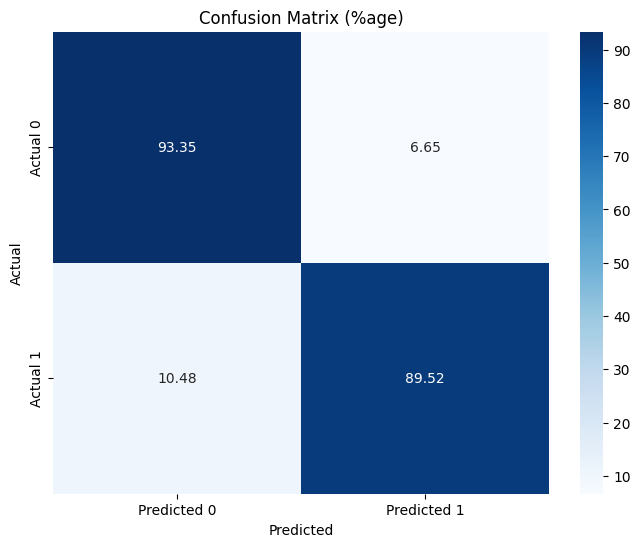

In [ ]:
# Import relevant libraries
import matplotlib.pyplot as plt
from IPython.display import Image
import imageio
from imageio import imread
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Update features to include the new numerical features and exclude 'date' column
features = [col for col in df2.columns if col not in ['lightning_caused', 'date', 'general_cause']]
# Prepare the data
target = 'lightning_caused'

# Split data into training and testing sets
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train a Random Forest model
model_lightning_caused = RandomForestClassifier(n_estimators=200, random_state=42)
model_lightning_caused.fit(X_train, y_train)


# Make predictions on the test set
y_pred = model_lightning_caused.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix

# Normalize the confusion matrix to percentages
conf_matrix_percentage = (conf_matrix / conf_matrix.sum(axis=1, keepdims=True)) * 100

# Create a heatmap of the normalized confusion matrix (in percentages)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (%age)')
plt.show()


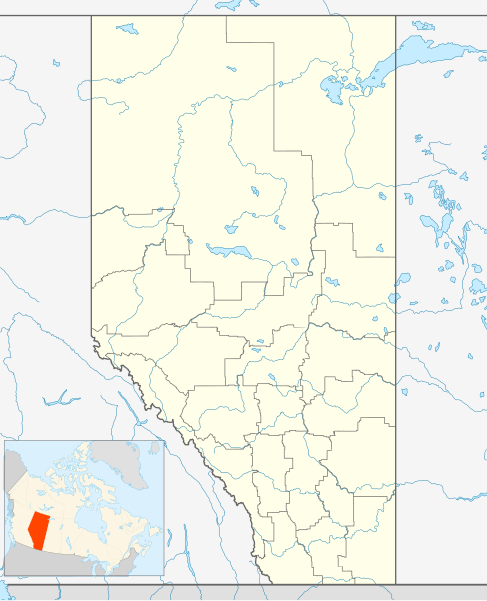

In [ ]:
# Upload a PNG of Alberta from the drive and display it
image_path = '/content/drive/Shareddrives/ENG M 680/Alberta outline.png'

try:
  display(Image(filename=image_path))
except FileNotFoundError:
  print(f"Image not found at path: {image_path}")

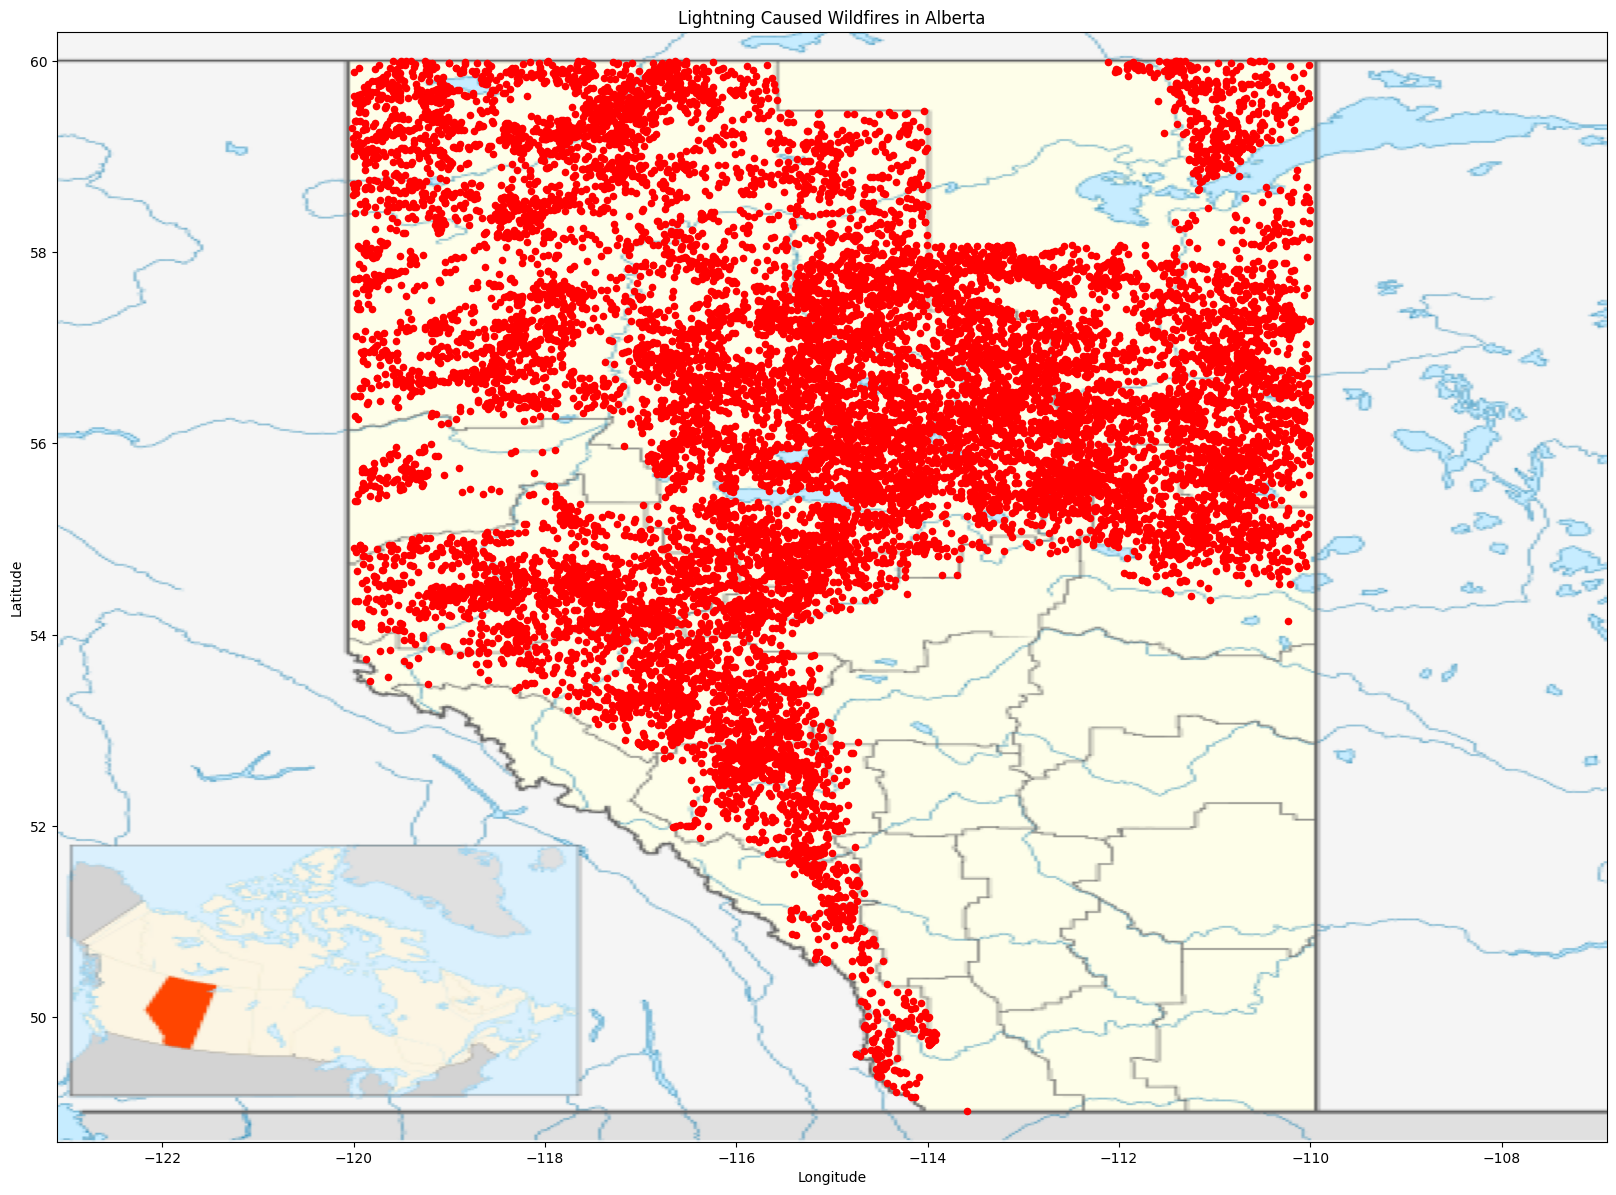

In [ ]:
# Import relevant libraries
import numpy as np
from PIL import Image

# Load the Alberta map image
alberta_map = Image.open(image_path)
alberta_map_array = np.array(alberta_map)

# Function to create and display a heatmap on the Alberta map for each cause
def plot_heatmap(cause_column, cause_value, title):
  cause_df = df2[df2[cause_column] == cause_value]

  # Extract latitude and longitude
  latitudes = cause_df['latitude'].values
  longitudes = cause_df['longitude'].values

  # Create the plot
  fig, ax = plt.subplots(figsize=(20, 20))

  # Display the Alberta map as the background
  ax.imshow(alberta_map_array, extent=[-123.1, -106.9, 48.7, 60.3])

  # Plot heatmap
  plt.scatter(longitudes, latitudes, c='red', s=20, alpha=1)

  # Add labels and title
  ax.set_xlabel("Longitude")
  ax.set_ylabel("Latitude")
  ax.set_title(title)

  # Display the plot
  plt.show()

# Generate heatmap for lightning caused fires
plot_heatmap('lightning_caused', 1, "Lightning Caused Wildfires in Alberta")

In [ ]:
# Print all size_class
print(df2['size_class'].unique())

[3 1 0 2 4]


Accuracy: 0.9420814479638009

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3843
           1       0.92      0.99      0.96      2106
           2       0.60      0.72      0.65       411
           3       1.00      0.01      0.02       126
           4       0.55      0.08      0.13       144

    accuracy                           0.94      6630
   macro avg       0.81      0.56      0.55      6630
weighted avg       0.94      0.94      0.93      6630


Confusion Matrix (Percentage):
[[100.           0.           0.           0.           0.        ]
 [  0.          99.43019943   0.56980057   0.           0.        ]
 [  0.          26.76399027  72.26277372   0.           0.97323601]
 [  0.          15.07936508  80.15873016   0.79365079   3.96825397]
 [  0.          30.55555556  61.80555556   0.           7.63888889]]


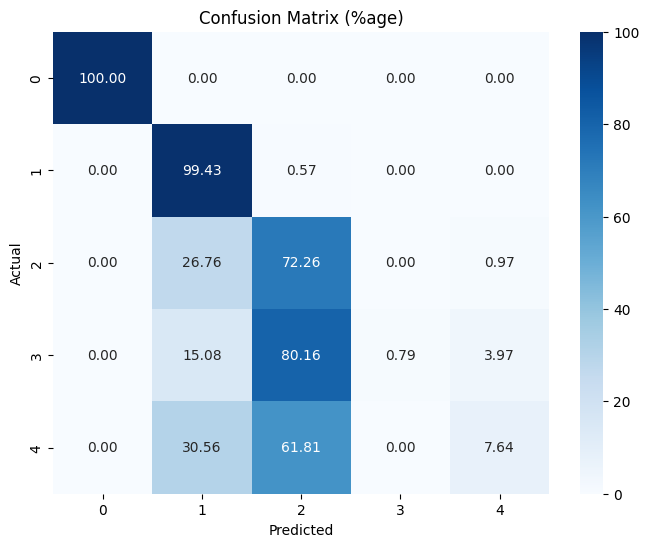

In [ ]:
# Split the dataset into training (1996–2015) and testing (2016–2020) sets
train_df2 = df2[(df2['year'] >= 1996) & (df2['year'] <= 2015)]
test_df2 = df2[(df2['year'] >= 2016) & (df2['year'] <= 2020)]

# Define features and target
features = [col for col in df2.columns if col not in ['size_class', 'date', 'general_cause']]
target = 'size_class'

# Split data into training and testing sets
X = df2[features]
y = df2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train a Random Forest model
model_size_class = RandomForestClassifier(n_estimators=200, random_state=42)
model_size_class.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_size_class.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percentage = (conf_matrix / conf_matrix.sum(axis=1, keepdims=True)) * 100

print("\nConfusion Matrix (Percentage):")
print(conf_matrix_percentage)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=model_size_class.classes_, yticklabels=model_size_class.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (%age)')
plt.show()

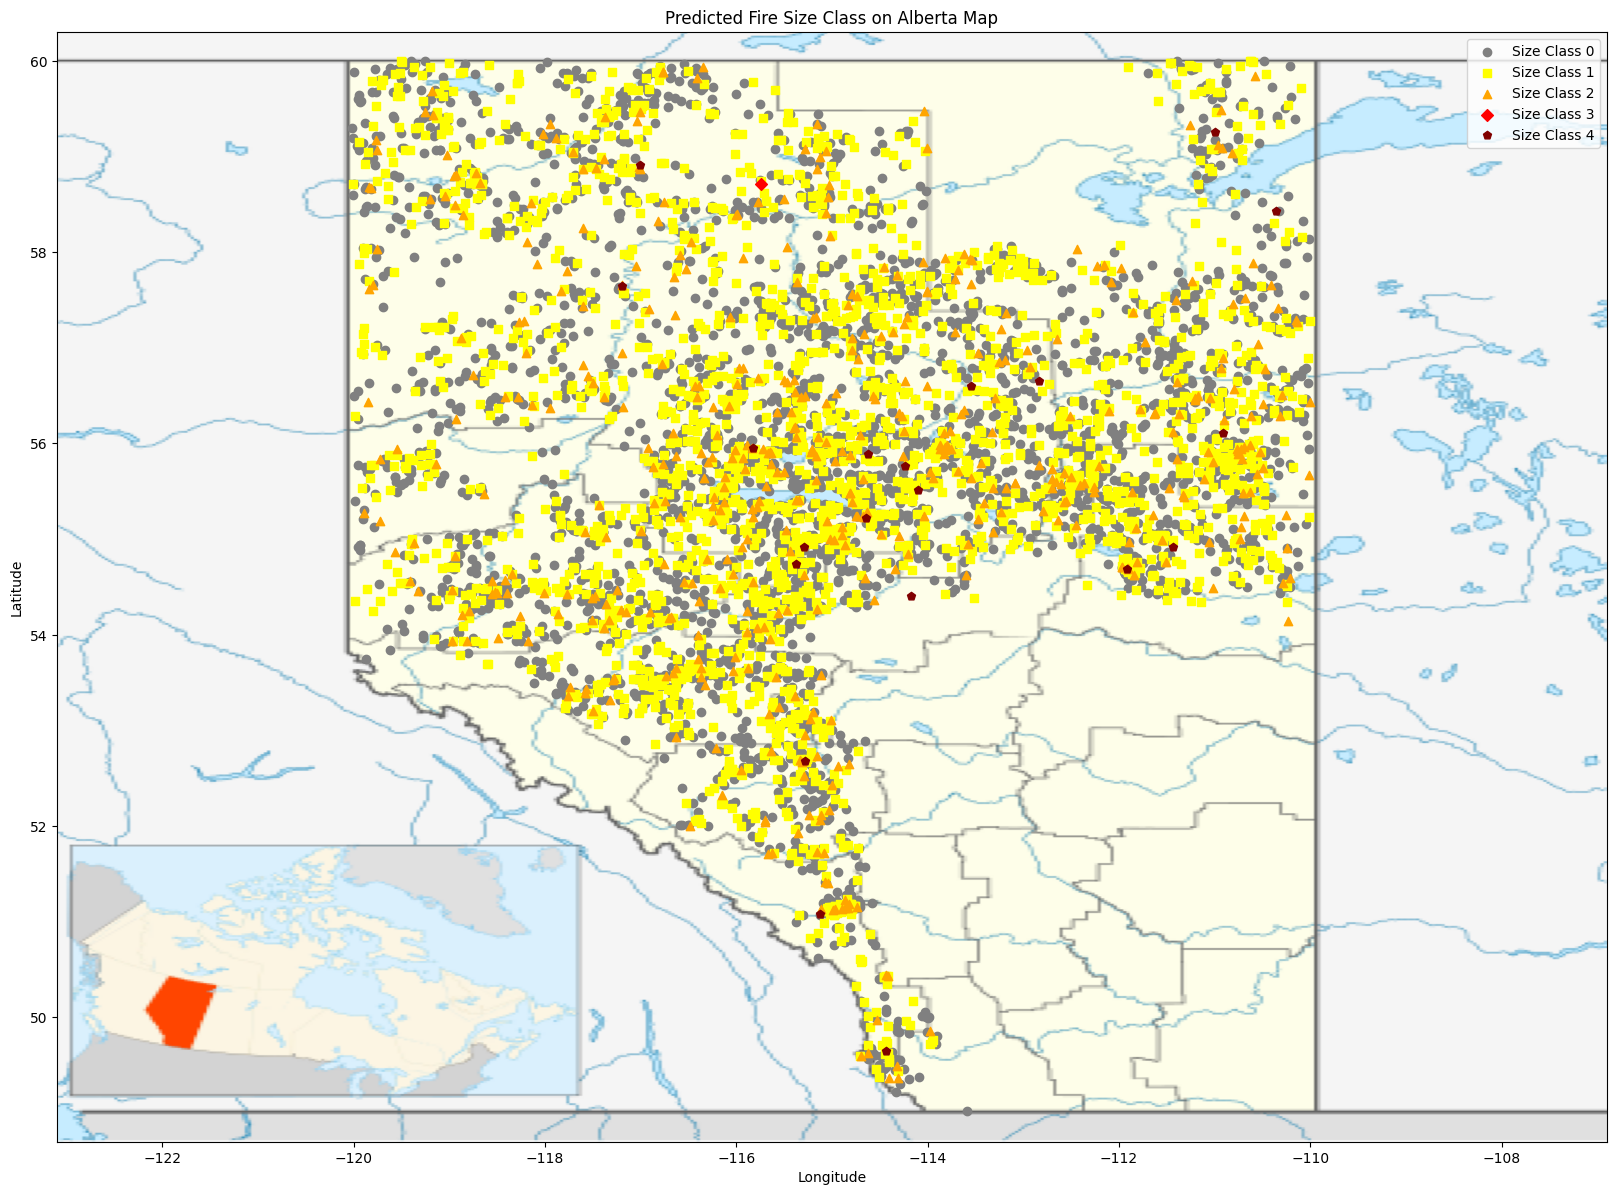

In [ ]:
# Load the Alberta map image
try:
    alberta_map = Image.open(image_path)
    alberta_map = np.array(alberta_map)
except FileNotFoundError:
    print(f"Error: Image file not found at '{image_path}'")
    exit()  # Exit the script if the image is not found

# Load latitude and longitude data
try:
    latitude = df2['latitude']
    longitude = df2['longitude']
except KeyError:
    print("Error: 'latitude' or 'longitude' columns not found in the dataframe.")
    exit()

# Create the plot
fig, ax = plt.subplots(figsize=(20, 20))

# Display the Alberta map as the background
ax.imshow(alberta_map, extent=[-123.1, -106.9, 48.7, 60.3])

# Define markers for each size class
markers = {
    0: 'o',  # Example marker for class 0
    1: 's',  # Example marker for class 1
    2: '^',  # Example marker for class 2
    3: 'D',  # Example marker for class 3
    4: 'p',  # Example marker for class 4
}

# Define sizes for each size class
sizes = {
    0: 1,
    1: 1,
    2: 1,
    3: 1,
    4: 1,
}

# Define colors for each size class
colors = {
    0: 'gray',   # Color for class 0
    1: 'yellow',  # Color for class 1
    2: 'orange',    # Color for class 2
    3: 'red', # Color for class 3
    4: 'maroon', # Color for class 4
}

# Plot the predicted size classes on the map with different shapes and colors
for size_class in np.unique(y_pred):
    indices = np.where(y_pred == size_class)[0]  # Get the indices as a 1D array
    ax.scatter(longitude.iloc[indices], latitude.iloc[indices], label=f'Size Class {size_class}',
               marker=markers.get(size_class, 'x'),  # Default to 'x' if no marker is defined
               color=colors.get(size_class, 'black'), # Use the color dictionary
               alpha=1)

# Set plot labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Predicted Fire Size Class on Alberta Map')

# Add a legend
ax.legend()

# Display the plot
plt.show()

<ipython-input-21-63ff341b2814>:66: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames.append(imread(frame_filename))


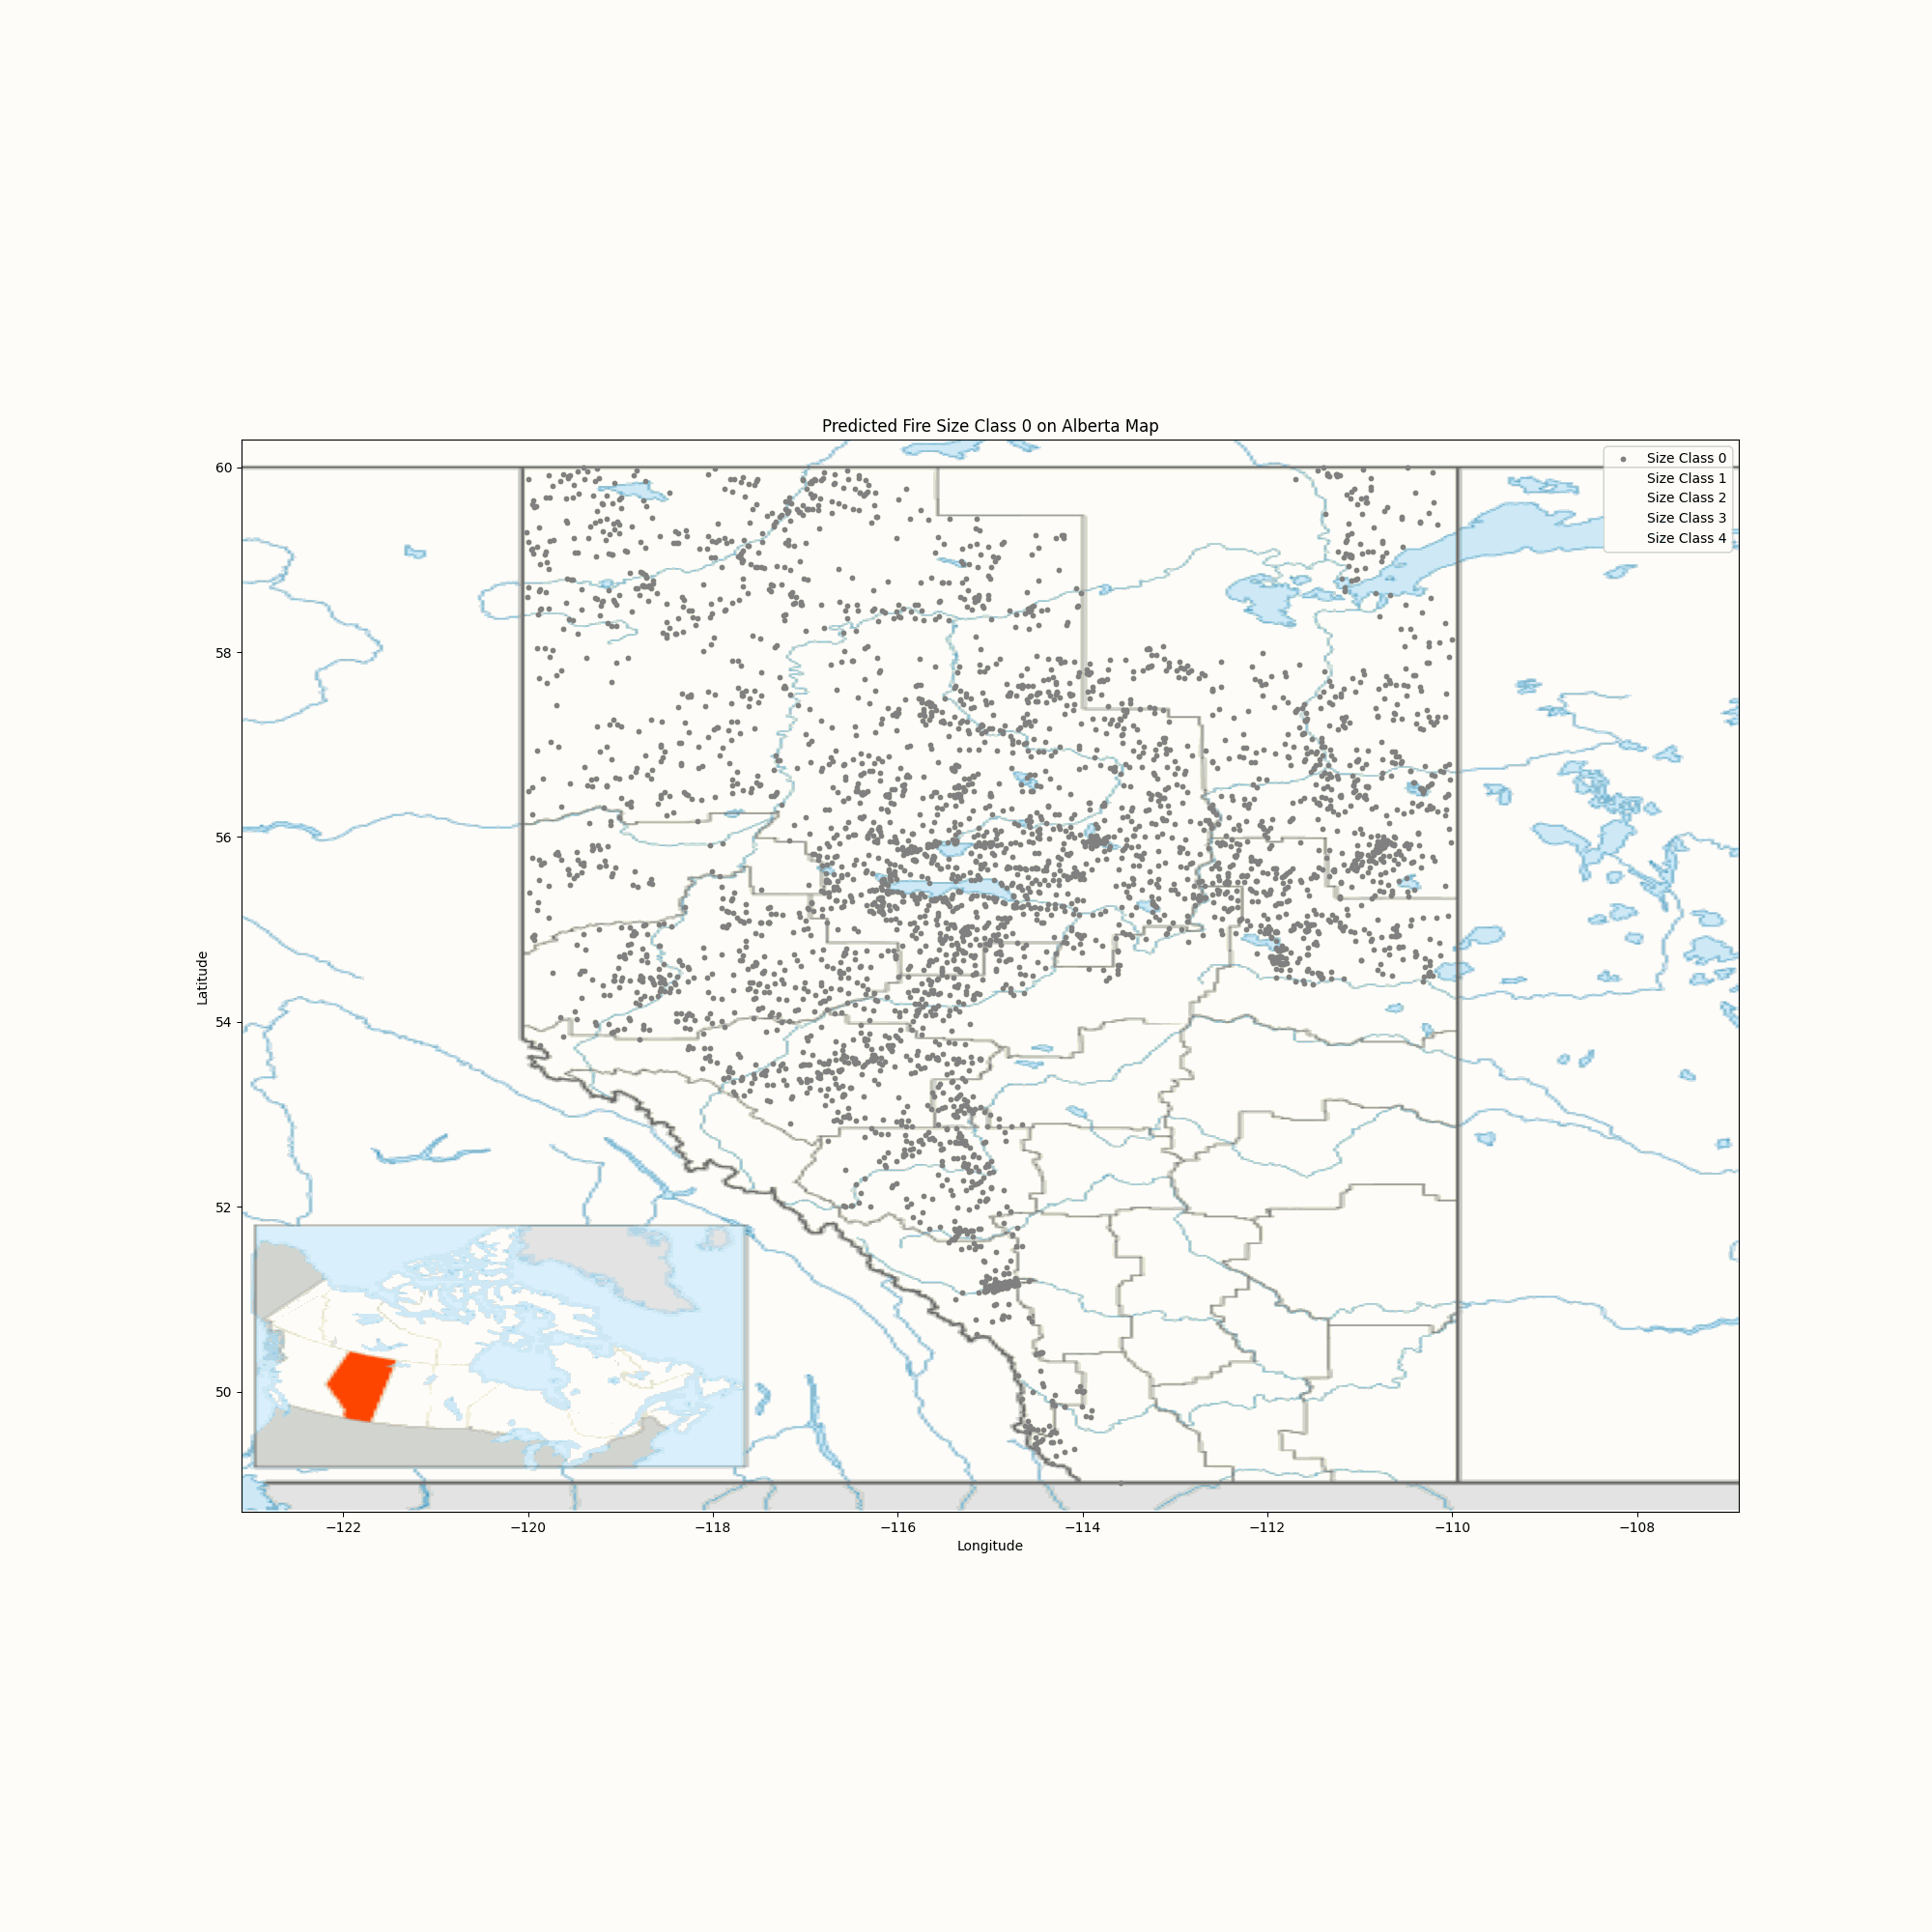

In [ ]:
# Import relevant libraries
import os
from IPython.display import Image
from PIL import Image as PILImage

# Load the Alberta map image
try:
    alberta_map = PILImage.open(image_path)
    alberta_map = np.array(alberta_map)
except FileNotFoundError:
    print(f"Error: Image file not found at '{image_path}'")
    exit()

# Define markers for each size class
markers = {
    0: 'o',  # Example marker for class 0
    1: 's',  # Example marker for class 1
    2: '^',  # Example marker for class 2
    3: 'D',  # Example marker for class 3
    4: 'p',  # Example marker for class 4
    # Add more markers as needed for additional classes
}

# Define sizes for each size class
sizes = {
    0: 10,
    1: 10,
    2: 10,
    3: 10,
    4: 10,
}

# Define colors for each size class
colors = {
    0: 'gray',   # Color for class 0
    1: 'yellow',  # Color for class 1
    2: 'orange',    # Color for class 2
    3: 'red', # Color for class 3
    4: 'maroon', # Color for class 4
}

# Create a directory to store individual frames
output_dir = "gif_frames"
os.makedirs(output_dir, exist_ok=True)

# Generate individual frames for the GIF
frames = []
for size_class in np.unique(y_pred):
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.imshow(alberta_map, extent=[-123.1, -106.9, 48.7, 60.3])

    for sc in np.unique(y_pred):  # Iterate through all size classes
        indices = np.where(y_pred == size_class)[0]
        ax.scatter(longitude.iloc[indices], latitude.iloc[indices],
                   label=f'Size Class {sc}', marker=markers.get(sc, 'x'),
                   s=sizes.get(sc, 20), alpha=1, color=colors.get(size_class, 'black'), visible=(sc == size_class)) #Only show current size_class

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Predicted Fire Size Class {size_class} on Alberta Map')
    ax.legend()

    frame_filename = os.path.join(output_dir, f"frame_{size_class}.png")
    plt.savefig(frame_filename)
    plt.close(fig)
    frames.append(imread(frame_filename))


# Create the GIF
imageio.mimsave("size_class_animation.gif", frames, fps=1) # Adjust fps as needed

# Display the GIF
display(Image(filename='size_class_animation.gif'))

In [ ]:
# prompt: show the max and min year  df3

print(f"Max year in df3: {df3['year'].max()}")
print(f"Min year in df3: {df3['year'].min()}")

Max year in df3: 2020
Min year in df3: 1996


In [ ]:
# Remove rows where 'year' is below 1996
df3 = df3[df3['year'] >= 1996]

In [ ]:
# Convert 'date' column in df3 to datetime objects
df3['date'] = pd.to_datetime(df3['date'])

# Extract numerical features from the 'date' column
df3['year'] = df3['date'].dt.year
df3['month'] = df3['date'].dt.month
df3['day'] = df3['date'].dt.day
df3['hour'] = df3['date'].dt.hour

# Merge df2 and df3
merged_df = pd.merge(df2, df3, on='date', how='inner')
merged_df

,year_x,date,smoke_type,smoke_color,smoke_base_size,condition_of_smoke,latitude,longitude,fire_spread_rate,fire_type,...,dmc,dc,isi,bui,fwi,dsr,year_y,month_y,day_y,hour_y
0,1998,1998-05-23,4,5,5,3,59.6236,-110.2064,0.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,1998,5,23,0
1,1998,1998-05-23,4,5,5,3,59.6236,-110.2064,0.0,3,...,46.0,292.4,7.4,66.0,20.7,5.81,1998,5,23,0
2,1998,1998-05-23,4,5,5,3,59.6236,-110.2064,0.0,3,...,14.6,206.6,1.1,24.8,1.5,0.06,1998,5,23,0
3,1998,1998-05-23,4,5,5,3,59.6236,-110.2064,0.0,3,...,42.6,246.9,3.7,59.5,11.5,2.05,1998,5,23,0
4,1998,1998-05-23,4,5,5,3,59.6236,-110.2064,0.0,3,...,26.7,256.0,1.0,42.4,2.6,0.14,1998,5,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,1999,1999-07-12,4,5,5,3,55.8062,-111.0331,0.0,4,...,19.3,71.7,9.1,23.1,14.1,2.92,1999,7,12,0
721,1999,1999-07-12,4,5,5,3,55.8062,-111.0331,0.0,4,...,30.6,332.5,3.1,49.8,9.0,1.32,1999,7,12,0
722,1999,1999-07-12,4,5,5,3,55.8062,-111.0331,0.0,4,...,12.5,35.5,5.7,13.3,7.1,0.88,1999,7,12,0
723,1999,1999-07-12,4,5,5,3,55.8062,-111.0331,0.0,4,...,7.5,63.0,0.0,11.5,0.0,0.00,1999,7,12,0


In [ ]:
# Merge df1 and df3 based on 'station_id' for all years
df13 = pd.merge(df1, df3, on='station_id', how='inner')

# Display the merged DataFrame
df13.head()

,Unnamed: 0.1,Unnamed: 0_x,station_id,name,type,forecast_region,latitude,longitude,elevation_meters,geometry,...,dmc,dc,isi,bui,fwi,dsr,year,month,day,hour
0,0,1,AC,Adams Creek,LO,ED,53.7254,-118.5683,2177.63,POINT (264702.734833854 5956498.305364526),...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,25,0
1,0,1,AC,Adams Creek,LO,ED,53.7254,-118.5683,2177.63,POINT (264702.734833854 5956498.305364526),...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,27,0
2,0,1,AC,Adams Creek,LO,ED,53.7254,-118.5683,2177.63,POINT (264702.734833854 5956498.305364526),...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,28,0
3,0,1,AC,Adams Creek,LO,ED,53.7254,-118.5683,2177.63,POINT (264702.734833854 5956498.305364526),...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,29,0
4,0,1,AC,Adams Creek,LO,ED,53.7254,-118.5683,2177.63,POINT (264702.734833854 5956498.305364526),...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,30,0


In [ ]:
#Check the data in df13
df13.shape

(975225, 36)

In [ ]:
# Remove some features in df13
columns_to_remove_df13 = ['Unnamed: 0.1', 'Unnamed: 0_x', 'station_id', 'name', 'type',
                          'forecast_region', 'geometry', 'natural_subregion', 'forest_area', 'Unnamed: 0_y', 'update_timestamp']
df13 = df13.drop(columns=columns_to_remove_df13, errors='ignore')
df13.head()

,latitude,longitude,elevation_meters,date,dry_bulb_temperature,dew_point,relative_humidity,rain_mm,snow_cm,hail_mm,...,dmc,dc,isi,bui,fwi,dsr,year,month,day,hour
0,53.7254,-118.5683,2177.63,1996-05-25,6.0,-1.0,60.62,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,25,0
1,53.7254,-118.5683,2177.63,1996-05-27,0.5,-1.9,83.66,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,27,0
2,53.7254,-118.5683,2177.63,1996-05-28,-2.5,NaN,NaN,0.0,4.6,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,28,0
3,53.7254,-118.5683,2177.63,1996-05-29,-1.5,NaN,NaN,0.0,4.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,29,0
4,53.7254,-118.5683,2177.63,1996-05-30,-0.5,NaN,NaN,0.0,3.7,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1996,5,30,0


In [ ]:
# Group data by latitude and longitude
grouped = df13.groupby(['latitude', 'longitude'])

# Iterate through each group
for (latitude, longitude), group in grouped:
    # Identify numeric columns with missing values in the current group
    numeric_cols = group.select_dtypes(include=np.number).columns
    cols_with_missing = [col for col in numeric_cols if group[col].isnull().any()]

    # Iterate through columns with missing values
    for col in cols_with_missing:
        # Find the most frequent value for the column in this group, handling empty mode
        mode_values = group[col].mode()

        # If mode is empty, use NaN instead. You can change this to any other default value.
        most_frequent_value = mode_values[0] if not mode_values.empty else np.nan

        # Fill the missing values with the most frequent value
        df13.loc[(df13['latitude'] == latitude) & (df13['longitude'] == longitude), col] = df13.loc[(df13['latitude'] == latitude) & (df13['longitude'] == longitude), col].fillna(most_frequent_value)

In [ ]:
# Convert 'date' column in df13 to datetime if it's not already
df13['date'] = pd.to_datetime(df13['date'])


In [ ]:
# prompt: merge df13 and df2 based on same year and month and day

# Merge df13 and df2 based on 'year', 'month', and 'day'
df13['date'] = pd.to_datetime(df13['date'])
df13['year'] = df13['date'].dt.year
df13['month'] = df13['date'].dt.month
df13['day'] = df13['date'].dt.day

df2['date'] = pd.to_datetime(df2['date'])
df2['year'] = df2['date'].dt.year
df2['month'] = df2['date'].dt.month
df2['day'] = df2['date'].dt.day

merged_df = pd.merge(df13, df2, on=['year', 'month', 'day'], how='inner')
df123=merged_df
df123.shape

(4524410, 49)

In [ ]:
# prompt: print max value and min value of year in df123

print(f"Max year in df123: {df123['year'].max()}")
print(f"Min year in df123: {df123['year'].min()}")

Max year in df123: 2020
Min year in df123: 1996


In [ ]:
# prompt: now reorgonize the df123 based on smallest to biggest value for year

# Sort df123 by the 'year' column in ascending order
df123 = df123.sort_values(by='year', ascending=True)
df123

,latitude_x,longitude_x,elevation_meters,date_x,dry_bulb_temperature,dew_point,relative_humidity_x,rain_mm,snow_cm,hail_mm,...,temperature,relative_humidity_y,wind_direction,wind_speed,weather_conditions_over_fire,current_size,size_class,hour_of_day,hour_y,lightning_caused
44,53.725400,-118.568300,2177.63,1996-06-09,5.0,-5.6,46.12,0.01,0.01,0.0,...,17.943677,45.587522,191.690331,0.0,2,19,1,21.316667,21,0
45,53.725400,-118.568300,2177.63,1996-06-10,7.0,-2.7,50.21,0.00,0.00,0.0,...,17.943677,45.587522,225.000000,25.0,2,49,1,13.500000,13,0
46,53.725400,-118.568300,2177.63,1996-06-10,7.0,-2.7,50.21,0.00,0.00,0.0,...,17.943677,45.587522,225.000000,10.0,3,39,1,15.416667,15,0
47,53.725400,-118.568300,2177.63,1996-06-10,7.0,-2.7,50.21,0.00,0.00,0.0,...,17.943677,45.587522,225.000000,8.0,3,29,1,16.416667,16,1
48,53.725400,-118.568300,2177.63,1996-06-11,1.0,-2.7,76.39,0.00,0.30,0.0,...,17.943677,45.587522,225.000000,10.0,3,0,0,19.583333,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77071,59.176464,-119.455868,611.00,2020-06-27,19.5,7.3,45.11,0.00,0.00,0.0,...,18.000000,70.000000,0.000000,15.0,3,581,2,18.400000,18,1
77070,59.176464,-119.455868,611.00,2020-06-27,19.5,7.3,45.11,0.00,0.00,0.0,...,24.000000,40.000000,225.000000,10.0,2,19,1,16.450000,16,1
77053,59.176464,-119.455868,611.00,2020-06-20,27.0,14.1,45.11,0.00,0.00,0.0,...,29.000000,45.000000,191.690331,0.0,0,9,0,17.683333,17,1
77052,59.176464,-119.455868,611.00,2020-06-20,27.0,14.1,45.11,0.00,0.00,0.0,...,17.000000,100.000000,225.000000,15.0,4,0,0,16.566667,16,1


In [ ]:
# prompt: download df123

from google.colab import files
df123.to_csv('df123.csv', encoding = 'utf-8-sig')
files.download('df123.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>